In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:

customers = pd.read_csv(r"C:\Users\hp\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\hp\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\hp\Downloads\Transactions.csv")




customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [41]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [42]:

transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [43]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [44]:
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [45]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [46]:
# Check for missing values
print("\nMissing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [47]:
# check for duplicates values in all three datasets

print("\nDuplicate Values:")
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

    


Duplicate Values:
0
0
0


In [48]:
# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [49]:
# merge datasets 
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# save merged data to csv for further analysis
merged_data.to_csv("merged_data.csv", index=False)

### Key Analysis


#### Customer Distribution by Region

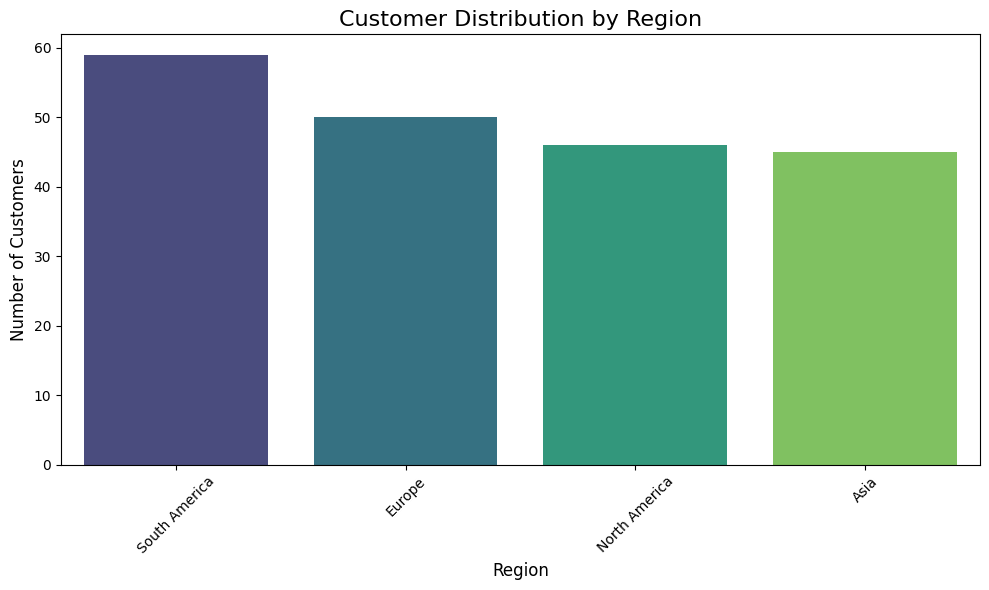

<Figure size 640x480 with 0 Axes>

In [50]:

# key Analysis 1:

region_counts = customers["Region"].value_counts()

# Visualizing with a Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis", hue=region_counts.index, dodge=False, legend=False)
plt.title("Customer Distribution by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()
plt.savefig('Customer Distribution by Region.png')


#### Product Performance:

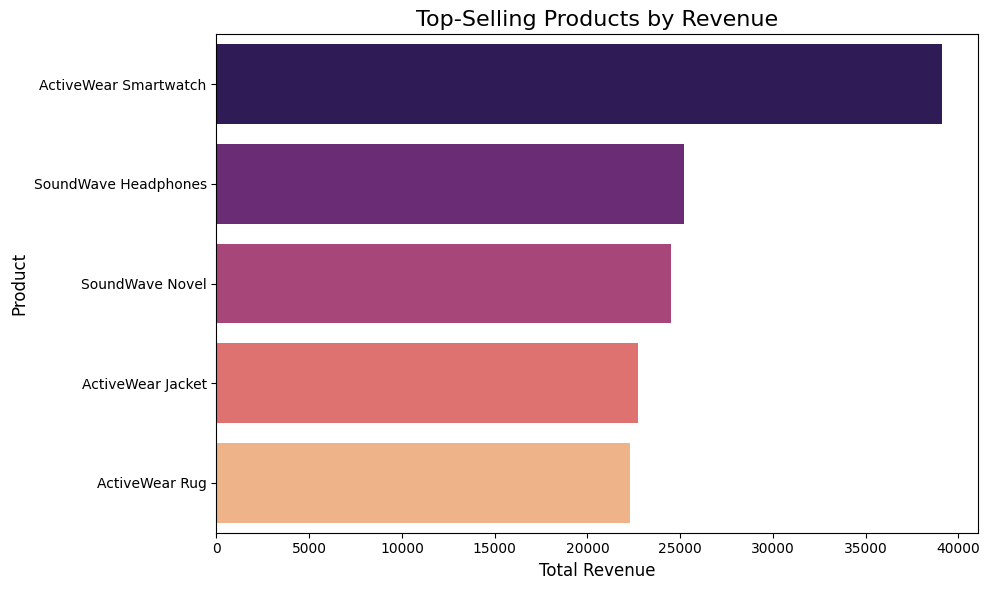

<Figure size 640x480 with 0 Axes>

In [51]:
# Key Analysis 2:

top_selling_products = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_products.values, y=top_selling_products.index, hue=top_selling_products.index, palette="magma", legend=False)
plt.title("Top-Selling Products by Revenue", fontsize=16)
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig('Top-Selling Products by Revenue.png')


#### Transaction Trends (Monthly Sales)

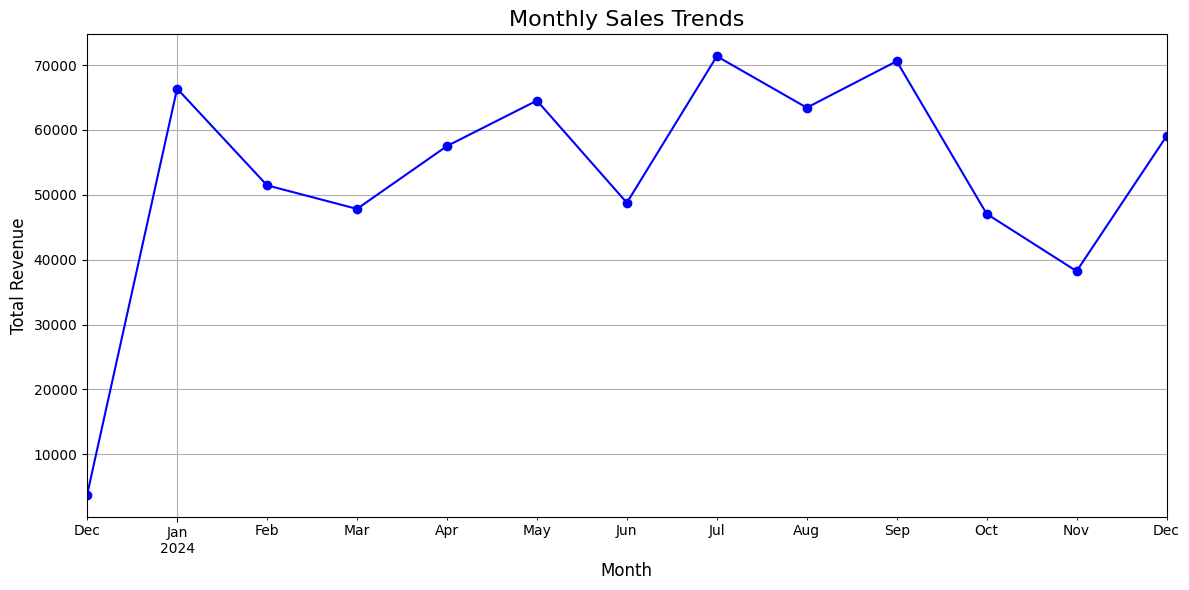

<Figure size 640x480 with 0 Axes>

In [52]:
# Key Analysis 3: 
merged_data["TransactionMonth"] = merged_data["TransactionDate"].dt.to_period("M")
monthly_sales = merged_data.groupby("TransactionMonth")["TotalValue"].sum()

# Visualizing Monthly Sales Trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="line", marker="o", color="b")
plt.title("Monthly Sales Trends", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('Monthly Sales Trends.png')

#### Customer Behavior (Repeat Purchase Rate)

In [53]:
# Key Analysis 4:
repeat_customers = transactions["CustomerID"].value_counts().gt(1).sum() / len(customers)

print(f"Repeat Purchase Rate: {repeat_customers:.2%}")

Repeat Purchase Rate: 93.50%


#### Revenue Analysis by Region

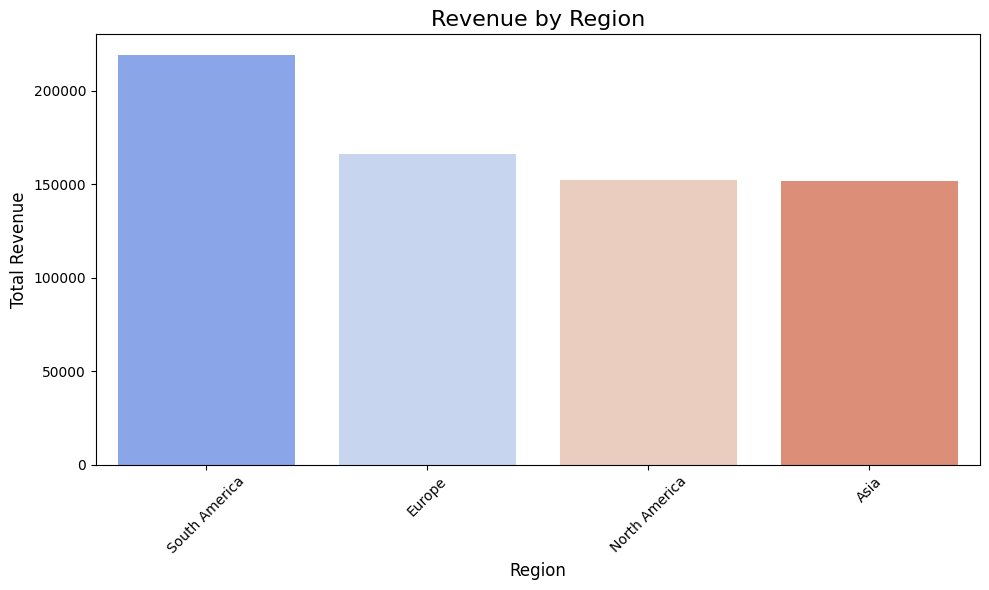

<Figure size 640x480 with 0 Axes>

In [54]:
# Key Analysis 5: 
revenue_by_region = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)

# Visualizing Revenue by Region
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, hue=revenue_by_region.index, palette="coolwarm", legend=False)
plt.title("Revenue by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()
plt.savefig('Revenue by Region.png')


#### Average Order Value (AOV)

In [55]:
# Key Analysis 6:

average_order_value = merged_data["TotalValue"].sum() / merged_data["TransactionID"].nunique()
print(f"Average Order Value: ${average_order_value:.2f}")

Average Order Value: $690.00
